<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem-1**

Epoch 0: Train Loss=0.7127, Val Loss=0.7141, Train Acc=0.3512, Val Acc=0.3399
Epoch 50: Train Loss=0.7016, Val Loss=0.7035, Train Acc=0.3610, Val Acc=0.3399
Epoch 100: Train Loss=0.6789, Val Loss=0.6812, Train Acc=0.7236, Val Acc=0.7124
Epoch 150: Train Loss=0.6155, Val Loss=0.6166, Train Acc=0.7106, Val Acc=0.6797
Epoch 200: Train Loss=0.5480, Val Loss=0.5465, Train Acc=0.7545, Val Acc=0.7190
Epoch 250: Train Loss=0.4952, Val Loss=0.4947, Train Acc=0.7740, Val Acc=0.7778
Epoch 300: Train Loss=0.4638, Val Loss=0.4756, Train Acc=0.7756, Val Acc=0.7843
Epoch 350: Train Loss=0.4483, Val Loss=0.4746, Train Acc=0.7902, Val Acc=0.7778

 ANN RESULTS
ANN Accuracy:  0.7712
ANN Precision: 0.6735
ANN Recall:    0.6346
ANN F1 Score:  0.6535


Logistic Regression RESULTS
LogReg Accuracy:  0.7843
LogReg Precision: 0.7111
LogReg Recall:    0.6154
LogReg F1 Score:  0.6598


SVM RESULTS
SVM Accuracy:  0.7190
SVM Precision: 0.5957
SVM Recall:    0.5385
SVM F1 Score:  0.5657




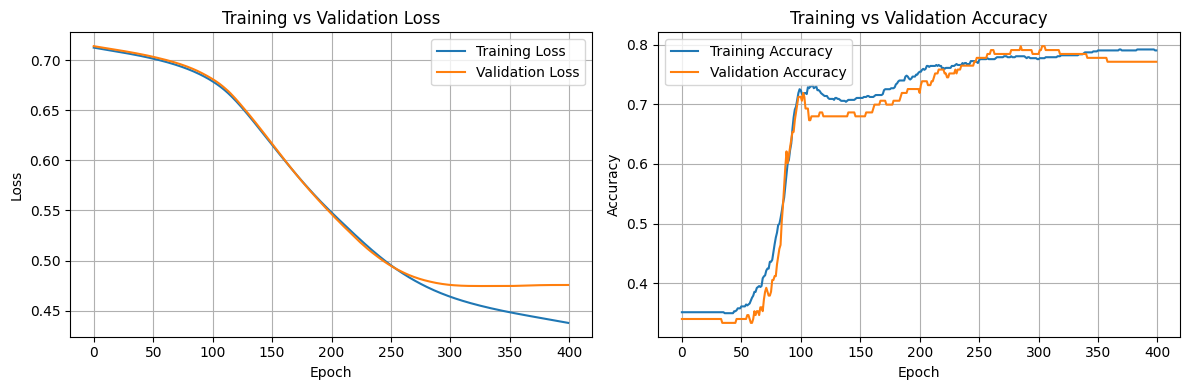

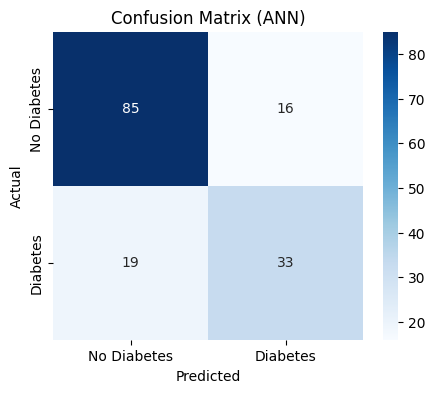

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

# LOAD DATASET
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# Convert to Tensor
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

# TRAIN/VALIDATION SPLIT (80/20)
N = len(X)
val_size = int(0.2 * N)
indices = torch.randperm(N)

train_idx = indices[:-val_size]
val_idx = indices[-val_size:]

X_train = X[train_idx]
y_train = y[train_idx]
X_val = X[val_idx]
y_val = y[val_idx]

# STANDARDIZE FEATURES
scaler = StandardScaler()
X_train_scaled = torch.FloatTensor(scaler.fit_transform(X_train))
X_val_scaled = torch.FloatTensor(scaler.transform(X_val))

# DEFINE ANN MODEL
class DiabetesNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 48),
            nn.ReLU(),
            nn.Linear(48, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )
    def forward(self, x):
        return self.fc(x)

model = DiabetesNN(input_dim=X_train_scaled.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# TRAINING LOOP
epochs = 400
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):

    # TRAIN
    model.train()
    optimizer.zero_grad()

    logits = model(X_train_scaled)
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()

    # Training metrics
    train_pred = torch.argmax(logits, dim=1)
    train_acc = (train_pred == y_train).float().mean().item()

    # VALIDATION
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val_scaled)
        val_loss = criterion(val_logits, y_val)
        val_pred = torch.argmax(val_logits, dim=1)
        val_acc = (val_pred == y_val).float().mean().item()

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss={loss:.4f}, Val Loss={val_loss:.4f}, "
              f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

# ANN Evaluation
y_val_np = y_val.numpy()
y_pred_ann = val_pred.numpy()

ann_accuracy = accuracy_score(y_val_np, y_pred_ann)
ann_precision = precision_score(y_val_np, y_pred_ann)
ann_recall = recall_score(y_val_np, y_pred_ann)
ann_f1 = f1_score(y_val_np, y_pred_ann)
ann_cm = confusion_matrix(y_val_np, y_pred_ann)

print("\n ANN RESULTS")
print(f"ANN Accuracy:  {ann_accuracy:.4f}")
print(f"ANN Precision: {ann_precision:.4f}")
print(f"ANN Recall:    {ann_recall:.4f}")
print(f"ANN F1 Score:  {ann_f1:.4f}")
print("\n")


# ADDITION: LOGISTIC REGRESSION & SVM COMPARISON


# Convert back to NumPy (sklearn expects numpy)
X_train_np = X_train_scaled.numpy()
X_val_np = X_val_scaled.numpy()

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_np, y_train.numpy())
log_pred = log_reg.predict(X_val_np)

log_accuracy = accuracy_score(y_val_np, log_pred)
log_precision = precision_score(y_val_np, log_pred)
log_recall = recall_score(y_val_np, log_pred)
log_f1 = f1_score(y_val_np, log_pred)

# SVM
svm_clf = SVC(kernel='rbf', C=2, gamma='scale')
svm_clf.fit(X_train_np, y_train.numpy())
svm_pred = svm_clf.predict(X_val_np)

svm_accuracy = accuracy_score(y_val_np, svm_pred)
svm_precision = precision_score(y_val_np, svm_pred)
svm_recall = recall_score(y_val_np, svm_pred)
svm_f1 = f1_score(y_val_np, svm_pred)

print("Logistic Regression RESULTS")
print(f"LogReg Accuracy:  {log_accuracy:.4f}")
print(f"LogReg Precision: {log_precision:.4f}")
print(f"LogReg Recall:    {log_recall:.4f}")
print(f"LogReg F1 Score:  {log_f1:.4f}")
print("\n")

print("SVM RESULTS")
print(f"SVM Accuracy:  {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall:    {svm_recall:.4f}")
print(f"SVM F1 Score:  {svm_f1:.4f}")
print("\n")


# PLOTS
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# CONFUSION MATRIX
plt.figure(figsize=(5,4))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix (ANN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Problem-2**

Epoch 0: Train Loss=0.6827, Val Loss=0.6835, Train Acc=0.6360, Val Acc=0.5929
Epoch 50: Train Loss=0.0974, Val Loss=0.1491, Train Acc=0.9781, Val Acc=0.9469
Epoch 100: Train Loss=0.0208, Val Loss=0.1532, Train Acc=0.9956, Val Acc=0.9558
Epoch 150: Train Loss=0.0065, Val Loss=0.1780, Train Acc=0.9978, Val Acc=0.9558
Epoch 200: Train Loss=0.0013, Val Loss=0.2192, Train Acc=1.0000, Val Acc=0.9558
Epoch 250: Train Loss=0.0004, Val Loss=0.2564, Train Acc=1.0000, Val Acc=0.9558
Epoch 300: Train Loss=0.0002, Val Loss=0.2824, Train Acc=1.0000, Val Acc=0.9558
Epoch 350: Train Loss=0.0001, Val Loss=0.3013, Train Acc=1.0000, Val Acc=0.9558

 ANN RESULTS
ANN Accuracy:  0.9558
ANN Precision: 0.9697
ANN Recall:    0.9552
ANN F1 Score:  0.9624

 Logistic Regression RESULTS
LogReg Accuracy:  0.9646
LogReg Precision: 0.9701
LogReg Recall:    0.9701
LogReg F1 Score:  0.9701

 SVM RESULTS
SVM Accuracy:  0.9646
SVM Precision: 0.9701
SVM Recall:    0.9701
SVM F1 Score:  0.9701


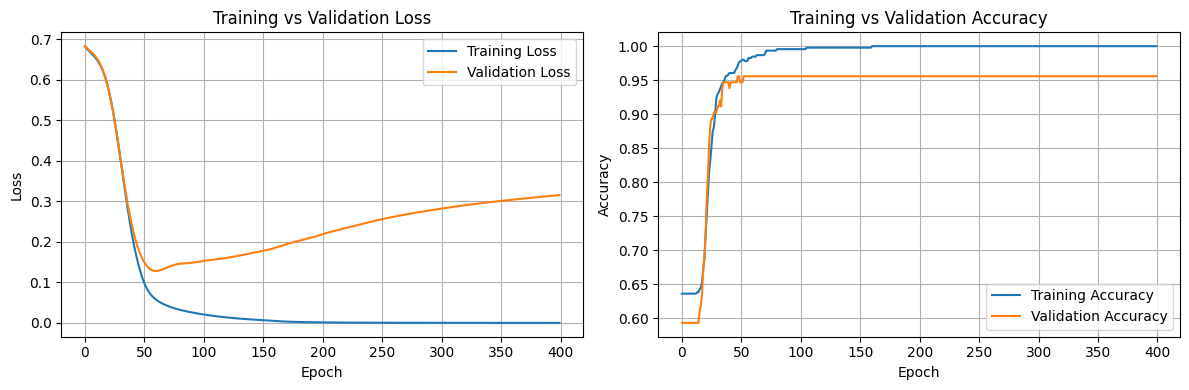

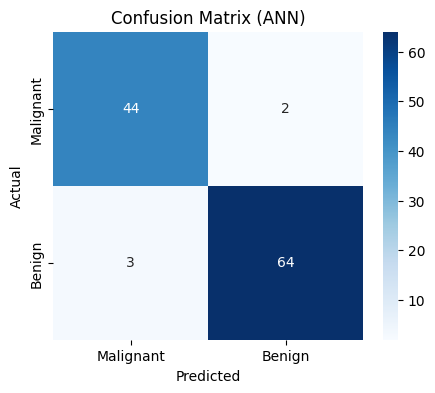

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)


# LOAD BREAST CANCER DATASET
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

X = torch.FloatTensor(X)
y = torch.LongTensor(y)

# TRAIN/VALIDATION SPLIT (80/20)
N = len(X)
val_size = int(0.2 * N)

indices = torch.randperm(N)
train_idx = indices[:-val_size]
val_idx = indices[-val_size:]

X_train = X[train_idx]
y_train = y[train_idx]
X_val = X[val_idx]
y_val = y[val_idx]

# STANDARDIZATION
scaler = StandardScaler()
X_train_scaled = torch.FloatTensor(scaler.fit_transform(X_train))
X_val_scaled = torch.FloatTensor(scaler.transform(X_val))


# DEFINE MULTI-LAYER ANN
class CancerNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 48),
            nn.ReLU(),
            nn.Linear(48, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.fc(x)


model = CancerNN(X_train_scaled.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# TRAINING LOOP
epochs = 400
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    # TRAIN
    model.train()
    optimizer.zero_grad()

    logits = model(X_train_scaled)
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()

    train_pred = torch.argmax(logits, dim=1)
    train_acc = (train_pred == y_train).float().mean().item()

    # VALIDATION
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val_scaled)
        val_loss = criterion(val_logits, y_val)

        val_pred = torch.argmax(val_logits, dim=1)
        val_acc = (val_pred == y_val).float().mean().item()

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss={loss:.4f}, Val Loss={val_loss:.4f}, "
              f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")


# FINAL ANN EVALUATION
y_val_np = y_val.numpy()
y_pred_np = val_pred.numpy()

ann_acc = accuracy_score(y_val_np, y_pred_np)
ann_prec = precision_score(y_val_np, y_pred_np)
ann_recall = recall_score(y_val_np, y_pred_np)
ann_f1 = f1_score(y_val_np, y_pred_np)

print("\n ANN RESULTS")
print(f"ANN Accuracy:  {ann_acc:.4f}")
print(f"ANN Precision: {ann_prec:.4f}")
print(f"ANN Recall:    {ann_recall:.4f}")
print(f"ANN F1 Score:  {ann_f1:.4f}")



# LOGISTIC REGRESSION MODEL


logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled.numpy(), y_train.numpy())
logreg_pred = logreg.predict(X_val_scaled.numpy())

log_acc = accuracy_score(y_val_np, logreg_pred)
log_prec = precision_score(y_val_np, logreg_pred)
log_recall = recall_score(y_val_np, logreg_pred)
log_f1 = f1_score(y_val_np, logreg_pred)

print("\n Logistic Regression RESULTS")
print(f"LogReg Accuracy:  {log_acc:.4f}")
print(f"LogReg Precision: {log_prec:.4f}")
print(f"LogReg Recall:    {log_recall:.4f}")
print(f"LogReg F1 Score:  {log_f1:.4f}")



#SUPPORT VECTOR MACHINE (SVM)


svm = SVC(kernel='rbf')
svm.fit(X_train_scaled.numpy(), y_train.numpy())
svm_pred = svm.predict(X_val_scaled.numpy())

svm_acc = accuracy_score(y_val_np, svm_pred)
svm_prec = precision_score(y_val_np, svm_pred)
svm_recall = recall_score(y_val_np, svm_pred)
svm_f1 = f1_score(y_val_np, svm_pred)

print("\n SVM RESULTS")
print(f"SVM Accuracy:  {svm_acc:.4f}")
print(f"SVM Precision: {svm_prec:.4f}")
print(f"SVM Recall:    {svm_recall:.4f}")
print(f"SVM F1 Score:  {svm_f1:.4f}")



# PLOTS


# LOSS CURVE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# ACCURACY CURVE
plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# CONFUSION MATRIX
cm = confusion_matrix(y_val_np, y_pred_np)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant','Benign'],
            yticklabels=['Malignant','Benign'])
plt.title("Confusion Matrix (ANN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Problem-3A**

Using device: cpu


100%|██████████| 170M/170M [00:10<00:00, 15.6MB/s]



 MODEL ARCHITECTURE
Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)

 PARAMETER DETAILS
0.weight              (512, 3072)  params=1572864
0.bias                (512,)  params=512
2.weight              (10, 512)  params=5120
2.bias                (10,)  params=10

Total Trainable Parameters: 1578506


Epoch 1/20 | Time: 40.69s | Train Loss: 1.6942 | Val Loss: 1.5593 | Train Acc: 0.4175 | Val Acc: 0.4499
Epoch 2/20 | Time: 33.46s | Train Loss: 1.4679 | Val Loss: 1.4721 | Train Acc: 0.4889 | Val Acc: 0.4873
Epoch 3/20 | Time: 31.19s | Train Loss: 1.3872 | Val Loss: 1.5104 | Train Acc: 0.5203 | Val Acc: 0.4800
Epoch 4/20 | Time: 29.72s | Train Loss: 1.3162 | Val Loss: 1.4779 | Train Acc: 0.5443 | Val Acc: 0.5028
Epoch 5/20 | Time: 28.66s | Train Loss: 1.2647 | Val Loss: 1.4519 | Train Acc: 0.5657 | Val Acc: 0.5127
Epoch 6/20 | Time: 29.24s | Train Loss: 1.1980 | Val Loss: 1.5376 | Train Acc

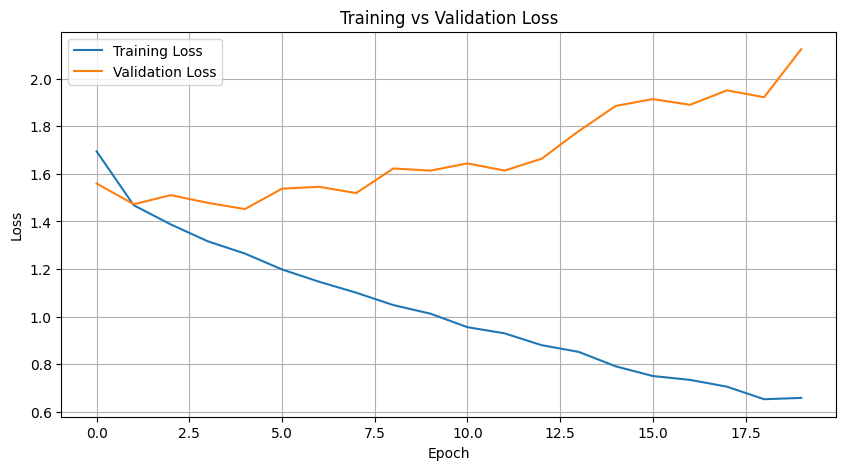

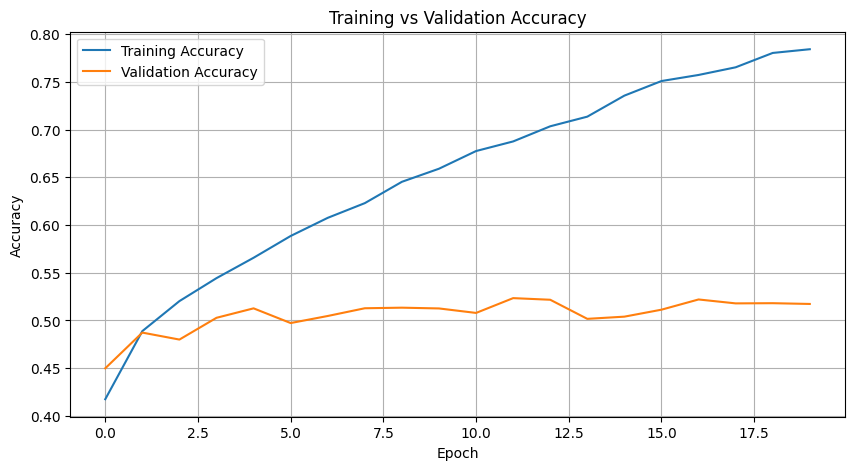

In [ ]:

# One Hidden Layer (512 Units)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt


# DEVICE SETUP (GPU if available)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))



# DATA PREPROCESSING (same as slides)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4915, 0.4823, 0.4468),   # mean
        (0.2470, 0.2435, 0.2616)    # std
    )
])

data_path = "./data"

train_dataset = datasets.CIFAR10(root=data_path, train=True,
                                 transform=transform, download=True)

test_dataset = datasets.CIFAR10(root=data_path, train=False,
                                transform=transform, download=True)



# DATA LOADERS

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False, num_workers=2)



# FULLY CONNECTED ANN (One Hidden Layer = 512)

model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),   # 3072 → 512
    nn.ReLU(),
    nn.Linear(512, 10)             # 512 → 10 classes
).to(device)


# MODEL SUMMARY (weights, biases, parameter count)

print("\n MODEL ARCHITECTURE")
print(model)

print("\n PARAMETER DETAILS")
total_params = 0
for name, param in model.named_parameters():
    print(f"{name:20s}  {tuple(param.shape)}  params={param.numel()}")
    total_params += param.numel()

print("\nTotal Trainable Parameters:", total_params)
print("\n")



# LOSS AND OPTIMIZER

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)



# TRAINING LOOP

n_epochs = 20  # can increase

train_losses = []
val_losses = []
train_accs = []
val_accs = []

total_start = time.time()

for epoch in range(n_epochs):

    epoch_start = time.time()
    model.train()

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for imgs, labels in train_loader:
        imgs = imgs.view(imgs.size(0), -1).to(device)  # flatten
        labels = labels.to(device)

        outputs = model(imgs)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / total_train
    train_acc = correct_train / total_train


    # VALIDATION LOSS + ACC

    model.eval()
    val_running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.view(imgs.size(0), -1).to(device)
            labels = labels.to(device)

            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            val_running_loss += loss.item() * imgs.size(0)

            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    val_loss = val_running_loss / total_test
    val_acc = correct_test / total_test

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{n_epochs} | "
          f"Time: {epoch_time:.2f}s | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | "
          f"Val Acc: {val_acc:.4f}")


total_training_time = time.time() - total_start
print(f"\nTotal Training Time: {total_training_time:.2f} seconds\n")



# PLOTS: LOSS + ACCURACY


# LOSS CURVE
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ACCURACY CURVE
plt.figure(figsize=(10,5))
plt.plot(train_accs, label="Training Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**Problem-3B**

Using device: cpu

 MODEL ARCHITECTURE
Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=10, bias=True)
)

 PARAMETER DETAILS
0.weight              (512, 3072)  params=1572864
0.bias                (512,)  params=512
2.weight              (256, 512)  params=131072
2.bias                (256,)  params=256
4.weight              (128, 256)  params=32768
4.bias                (128,)  params=128
6.weight              (10, 128)  params=1280
6.bias                (10,)  params=10

Total Trainable Parameters: 1738890


Epoch 1/300 | Time: 31.24s | Train Loss: 1.6548 | Val Loss: 1.5006 | Train Acc: 0.4124 | Val Acc: 0.4661
Epoch 2/300 | Time: 29.11s | Train Loss: 1.4356 | Val Loss: 1.4334 | Train Acc: 0.4926 | Val Acc: 0.4913
Epoch 3/300 | Time: 29.62s | Train Loss: 1.3

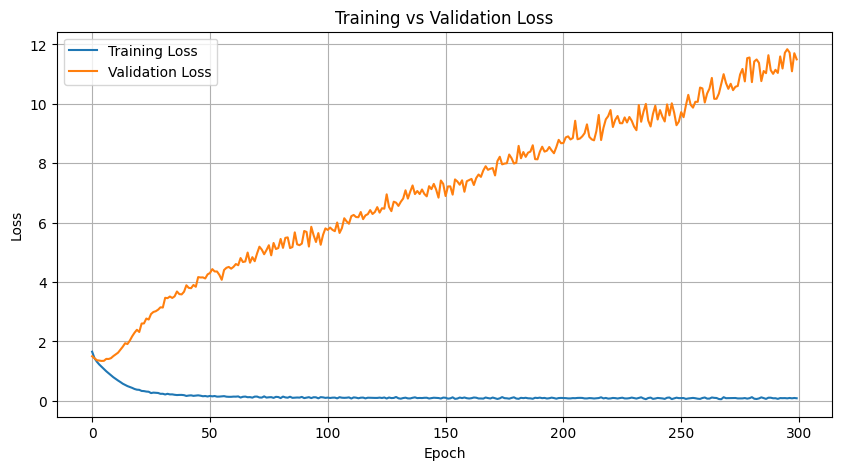

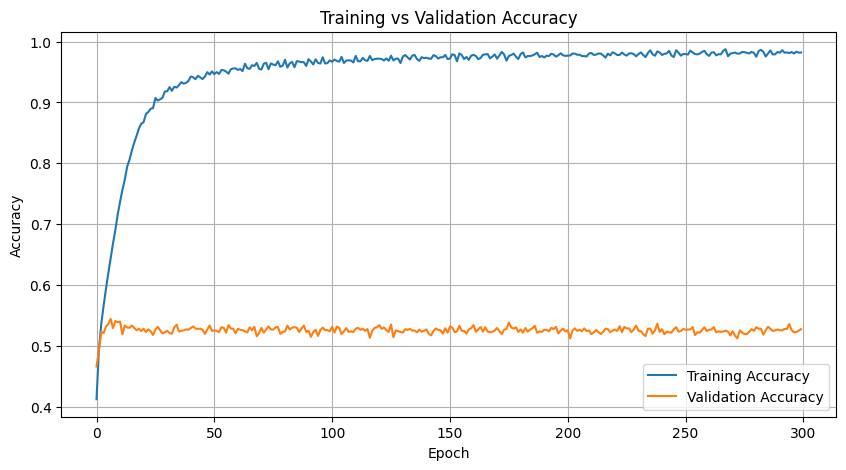

In [ ]:
# 3 Hidden Layers (512 → 256 → 128)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt



# DEVICE (GPU if available)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))



# DATA PREPROCESSING

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4915, 0.4823, 0.4468),
        (0.2470, 0.2435, 0.2616)
    )
])

data_path = "./data"

train_dataset = datasets.CIFAR10(root=data_path, train=True,
                                 transform=transform, download=True)

test_dataset = datasets.CIFAR10(root=data_path, train=False,
                                transform=transform, download=True)


batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False, num_workers=2)



# EXTENDED ANN — (3 Hidden Layers)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

print("\n MODEL ARCHITECTURE")
print(model)


# PARAMETER COUNT + SHAPES

print("\n PARAMETER DETAILS")
total_params = 0
for name, param in model.named_parameters():
    print(f"{name:20s}  {tuple(param.shape)}  params={param.numel()}")
    total_params += param.numel()

print("\nTotal Trainable Parameters:", total_params)
print("\n")



# LOSS AND OPTIMIZER

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)



# TRAINING LOOP (300 epochs)

n_epochs = 300
train_losses, val_losses = [], []
train_accs, val_accs = [], []

total_start = time.time()

for epoch in range(n_epochs):

    epoch_start = time.time()
    model.train()

    running_loss = 0
    correct_train = 0
    total_train = 0

    for imgs, labels in train_loader:
        imgs = imgs.view(imgs.size(0), -1).to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / total_train
    train_acc = correct_train / total_train


    # VALIDATION (with loss)

    model.eval()
    val_running_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.view(imgs.size(0), -1).to(device)
            labels = labels.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs, 1)

            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    val_loss = val_running_loss / total_test
    val_acc = correct_test / total_test

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{n_epochs} | "
          f"Time: {epoch_time:.2f}s | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Train Acc: {train_acc:.4f} | "
          f"Val Acc: {val_acc:.4f}")


total_training_time = time.time() - total_start
print(f"\nTotal Training Time: {total_training_time:.2f} seconds\n")



# PLOTS


# LOSS PLOT
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ACCURACY PLOT
plt.figure(figsize=(10,5))
plt.plot(train_accs, label="Training Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
